## Loading Data

I used a CTG exam dataset found on Kaggle from The Journal of Maternal-Fetal Medicine. 
The dataset contains 2,126 rows of 22 features extracted from CTG exams which were classified by expert obstetricians to three fetal health states : normal, suspect, pathological.  These are the target values the model will be predicting.

In [1]:
# Import Packages
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('fetal_health.csv') 
df.T

,0,1,2,3,4,5,6,7,8,9,...,2116,2117,2118,2119,2120,2121,2122,2123,2124,2125
baseline value,120.0,132.000,133.000,134.000,132.000,134.000,134.000,122.0,122.000,122.000,...,140.000,140.000,140.000,140.000,140.000,140.000,140.000,140.000,140.000,142.000
accelerations,0.0,0.006,0.003,0.003,0.007,0.001,0.001,0.0,0.000,0.000,...,0.004,0.000,0.000,0.000,0.000,0.000,0.001,0.001,0.001,0.002
fetal_movement,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.002
uterine_contractions,0.0,0.006,0.008,0.008,0.008,0.010,0.013,0.0,0.002,0.003,...,0.004,0.008,0.006,0.007,0.005,0.007,0.007,0.007,0.006,0.008
light_decelerations,0.0,0.003,0.003,0.003,0.000,0.009,0.008,0.0,0.000,0.000,...,0.000,0.000,0.001,0.001,0.001,0.000,0.000,0.000,0.000,0.000
severe_decelerations,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
prolongued_decelerations,0.0,0.000,0.000,0.000,0.000,0.002,0.003,0.0,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
abnormal_short_term_variability,73.0,17.000,16.000,16.000,16.000,26.000,29.000,83.0,84.000,86.000,...,80.000,79.000,79.000,79.000,77.000,79.000,78.000,79.000,78.000,74.000
mean_value_of_short_term_variability,0.5,2.100,2.100,2.400,2.400,5.900,6.300,0.5,0.500,0.300,...,0.200,0.300,0.500,0.600,0.700,0.200,0.400,0.400,0.400,0.400
percentage_of_time_with_abnormal_long_term_variability,43.0,0.000,0.000,0.000,0.000,0.000,0.000,6.0,5.000,6.000,...,36.000,20.000,26.000,27.000,17.000,25.000,22.000,20.000,27.000,36.000


## Data Dicitionary
- baseline value : Baseline Fetal Heart Rate (FHR)
- accelerations : Number of accelerations per second
- fetal_movement : Number of fetal movements per second
- uterine_contractions : Number of uterine contractions per second
- light_decelerations : Number of LDs per second
- severe_decelerations : Number of SDs per second
- prolongued_decelerations : Number of PDs per second
- abnormal_short_term_variability : Percentage of time with abnormal short term variability
- mean_value_of_short_term_variability : Mean value of short term variability
- percentage_of_time_with_abnormal_long_term_variability : Percentage of time with abnormal long term variability
- mean_value_of_long_term_variability : Mean value of long term variability
- histogram_width: Width of the histogram made using all values from a record
- histogram_min : Histogram minimum value
- histogram_max: Histogram maximum value
- histogram_number_of_peaks : Number of peaks in the exam histogram
- histogram_number_of_zeroes : Number of zeroes in the exam histogram
- histogram_mode : Hist mode
- histogram_mean : Hist mean
- histogram_median : Hist Median
- histogram_variance : Hist variance
- histogram_tendency : Histogram trend
- fetal_health : Fetal health: 1 - Normal 2 - Suspect 3 - Pathological

## Data Cleaning
Before we started the exploratory data analysis, we need to check what kind of data cleaning we need to perform. The dataset didn't contain any missing or null values. The only data cleaning we performed is renaming the columns, so it is more readable. I renamed 'baseline value', 'abnormal_short_term_variability, 'mean_value_of_short_term_variability', 'percentage_of_time_with_abnormal_long_term_variability', and 'mean_value_of_long_term_variability' to 'baseline_FHR', 'abnormal_STV', 'mean_STV', 'percentage_duration_LTV', and 'mean_LTV'.

In [3]:
#Check for null Values
df.isna().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [4]:
#rename columns
df.rename(columns={'baseline value':'baseline_FHR',
                   'abnormal_short_term_variability':'abnormal_STV',
                   'mean_value_of_short_term_variability':'mean_STV',
                   'percentage_of_time_with_abnormal_long_term_variability':'percentage_duration_LTV',
                   'mean_value_of_long_term_variability':'mean_LTV'}, inplace=True)

In [5]:
#Data types
df.dtypes

baseline_FHR                  float64
accelerations                 float64
fetal_movement                float64
uterine_contractions          float64
light_decelerations           float64
severe_decelerations          float64
prolongued_decelerations      float64
abnormal_STV                  float64
mean_STV                      float64
percentage_duration_LTV       float64
mean_LTV                      float64
histogram_width               float64
histogram_min                 float64
histogram_max                 float64
histogram_number_of_peaks     float64
histogram_number_of_zeroes    float64
histogram_mode                float64
histogram_mean                float64
histogram_median              float64
histogram_variance            float64
histogram_tendency            float64
fetal_health                  float64
dtype: object

### Target Values

The target class, fetal health, is very unbalanced. About 78 percent of the fetal health outcomes observed in this dataset are Normal. The class with the second-highest frequency is the Suspect fetal health which accounts for about 14 percent and the lowest frequency is Pathological fetal health which accounts for about 8 percent. The dataset already had the target values encoded in ordinal order: Normal was 1, Suspect was 2, Pathological was 3. Ordinal encoding converts each label into integer values and the encoded data represents the sequence of labels. In this scenario, Normal indicates that the fetus is healthy so low concern, Suspect indicates the fetus should be monitored so medium concern, and Pathological indicates problematic state so high concern. Most importantly, the model could become more inclined towards learning and predicting the Normal class than the Distressed class.

Text(0.5, 1.0, 'Count of Target Variable')

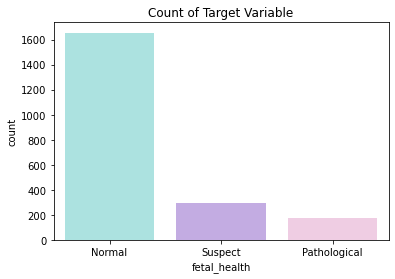

In [6]:
colors=["#A3EBE8","#C2A3EB", "#F5C7E5"]
ax=sns.countplot(data= df, x="fetal_health",palette=colors)
ax.set_xticklabels(["Normal","Suspect","Pathological"])
ax.set_title("Count of Target Variable")

In [7]:
data = {'count':df["fetal_health"].value_counts(),'percent':(df["fetal_health"].value_counts() / len(df["fetal_health"])) * 100}
target_df = pd.DataFrame(data)
target_df.index=["Normal","Suspect","Pathological"]
target_df

,count,percent
Normal,1655,77.845720
Suspect,295,13.875823
Pathological,176,8.278457


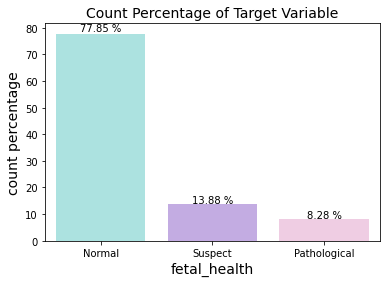

In [8]:
ax = sns.barplot(x=target_df.index,y=round(target_df.percent,2),palette=colors)
plt.title("Count Percentage of Target Variable", fontsize = 14)
plt.xlabel("fetal_health", fontsize = 14)
plt.ylabel("count percentage", fontsize = 14)

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x = p.get_x()
    y = p.get_y()
    ax.annotate(f"{height} %", (x + width/2, y + height*1.01), ha="center")

plt.show()

### Correlation

- a strong negative correlation with accelerations
- a slight positive corr with baseline fhr
- a slight negative correlation with uterine contractions
- a strong positive corr with prolongued decelerations 
- a strong positive corr for abnormal STV 
- a strong correlation between percentage duration LTV

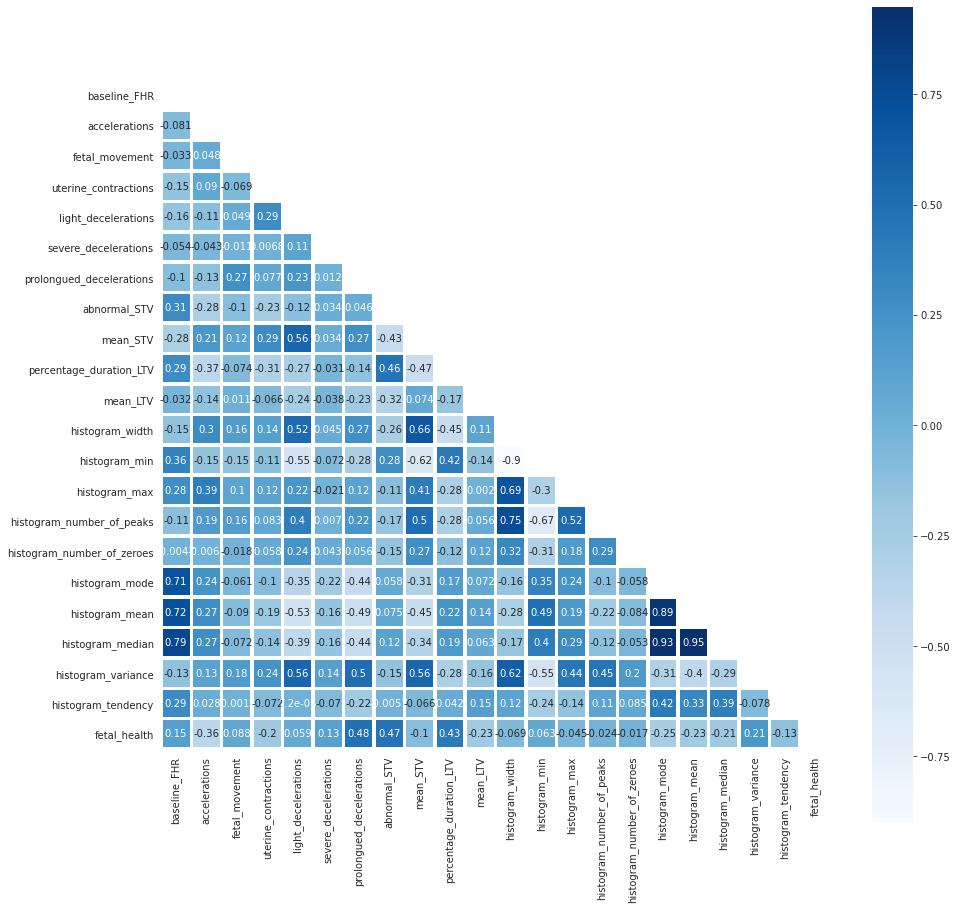

In [9]:
#visualize the correlation
target = df["fetal_health"]
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 15))
    ax = sns.heatmap(corr,mask=mask,square=True,linewidths=2.5,cmap="Blues",annot=True)

### Baseline FHR

- an almost normal distribution for the normal fetal health and the pathological cases. This means that there are more number of cases with intermediate baseline heart rate.
- a right skewed distribution for suspect fetal health, which means that more number of suspect cases have a baseline heart rate that lies on the higher side

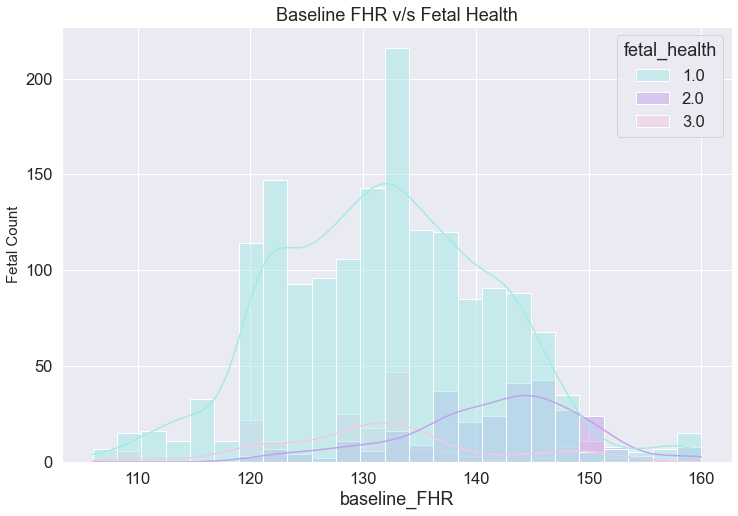

In [10]:
plt.figure(figsize=(12,8))
sns.set(font_scale=1.5)
sns.histplot(data=df, x='baseline_FHR', kde=True, hue="fetal_health", palette=colors)
plt.title('Baseline FHR v/s Fetal Health', fontsize=18)
plt.ylabel('Fetal Count', fontsize=15);

### Acceleration

- Suspect and Pathological fetal health have the highest accelerationn value is 0.00050 while normal fetal health have wider set of values and its max is above 0.0175

Text(0.5, 1.0, 'Accelerations in Baseline FHR wrt the fetal health categories')

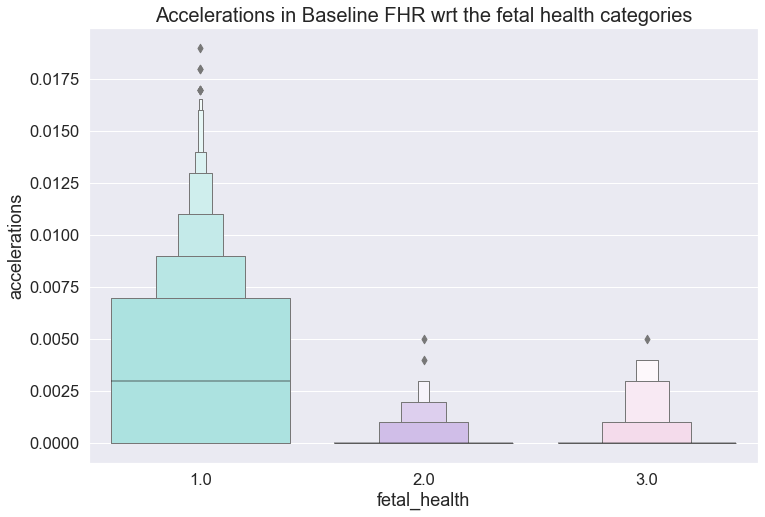

In [11]:
plt.figure(figsize=(12,8))
sns.set(font_scale=1.5)
sns.boxenplot(data=df, x="fetal_health", y="accelerations", palette=colors)
plt.title('Accelerations in Baseline FHR wrt the fetal health categories', fontsize=20)

### Uterine Contractions

- Pathological and Normal have the highest number of uterine contractions while suspect have least

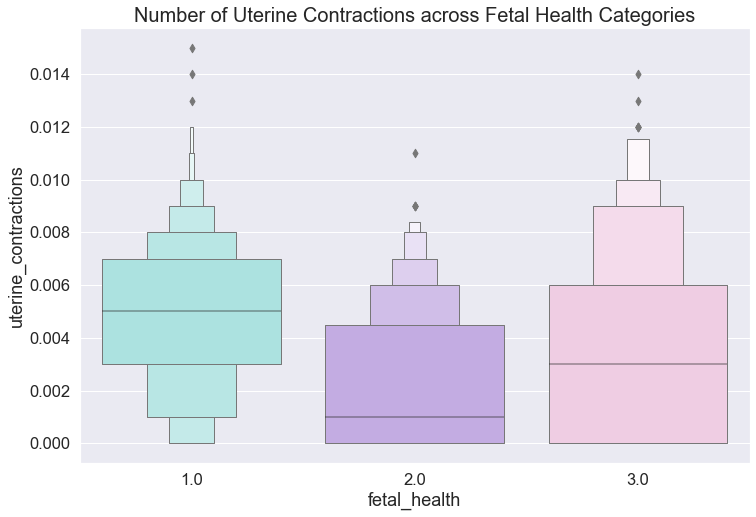

In [12]:
plt.figure(figsize=(12,8))
sns.set(font_scale=1.5)
sns.boxenplot(data=df, x="fetal_health", y="uterine_contractions", palette=colors)
plt.title("Number of Uterine Contractions across Fetal Health Categories", fontsize=20);

### Prolongued_Decelerations

Normal: Majority of the fetuses except for a few show 0 prolongued decelerations

Distressed: Fetuses experiencing 0 to 0.004 PDs per second

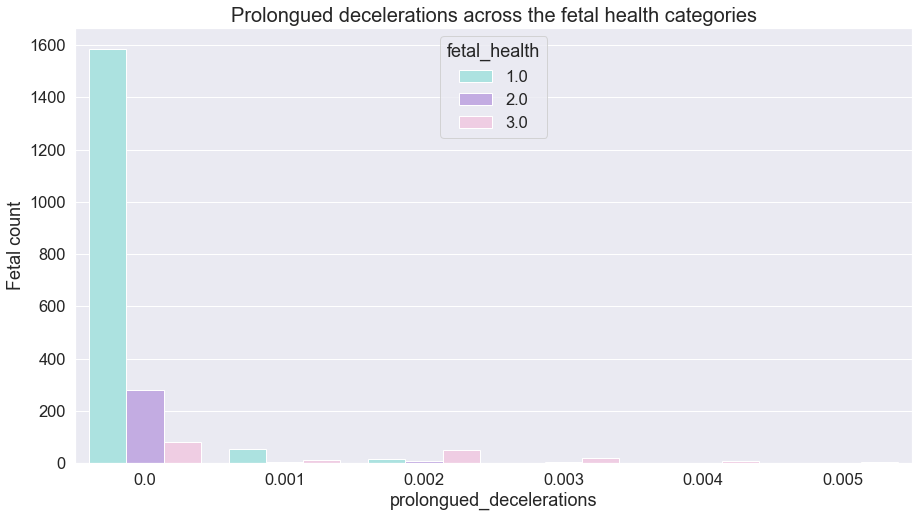

In [14]:
plt.figure(figsize=(15,8))
sns.countplot(data=df, x="prolongued_decelerations", hue="fetal_health", palette=colors)
plt.title("Prolongued decelerations across the fetal health categories", fontsize=20)
plt.ylabel("Fetal count", fontsize=18);

### Encoding

To make the data slightly easier to work with and understand, and I turned it into a binary classification problem. I combined the Suspect and Pathological classes into a category called Distressed. Therefore, I changed every instance of the Pathological fetal health class which was already encoded as three into a two or Distressed class. The Normal and Suspect classes remained the same. This maintains the order or hierarchy of the target variables as before. However, the target class is still very imbalanced. About 78 percent of the fetal health outcomes are Normal while 22 percent of the fetal health outcomes are Distressed. Regardless, it is somewhat more straightforward as a binary classification problem. Since we are working to maximize fetal health, then any member of a Distressed category should be treated with seriousness and urgency.

In [15]:
df.loc[df['fetal_health']==1.000, 'fetal_health'] = 1
df.loc[df['fetal_health']==2.000, 'fetal_health'] = 2
df.loc[df['fetal_health']==3.000, 'fetal_health'] = 2

In [16]:
df['fetal_health'].value_counts()

1.0    1655
2.0     471
Name: fetal_health, dtype: int64

In [17]:
df.to_csv("clean_data.csv",index=False)

In [18]:
data = {'count':df["fetal_health"].value_counts(),'percent':(df["fetal_health"].value_counts()/ len(df["fetal_health"])) * 100}
new_target_df = pd.DataFrame(data)
new_target_df.index=["Normal","Distressed"]
new_target_df

,count,percent
Normal,1655,77.84572
Distressed,471,22.15428


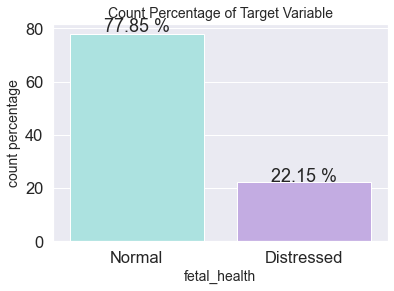

In [19]:
ax = sns.barplot(x=new_target_df.index,y=round(new_target_df.percent,2),palette=colors)
plt.title("Count Percentage of Target Variable", fontsize = 14)
plt.xlabel("fetal_health", fontsize = 14)
plt.ylabel("count percentage", fontsize = 14)

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x = p.get_x()
    y = p.get_y()
    ax.annotate(f"{height} %", (x + width/2, y + height*1.01), ha="center")

plt.show()

### Correlation After Encoding

The feature showing the highest positive moderate correlation with fetal health are abnormal_STV and percentage_duration_LTV, with a correlation of 0.49. There are also moderate correlations observed between fetal health and prolonged decelerations,with a correlation of 0.34 and baseline_FHR with a correlation of 0.25. There's a negative correlation with accerlations of -0.39. The correlation stayed same for the most part.

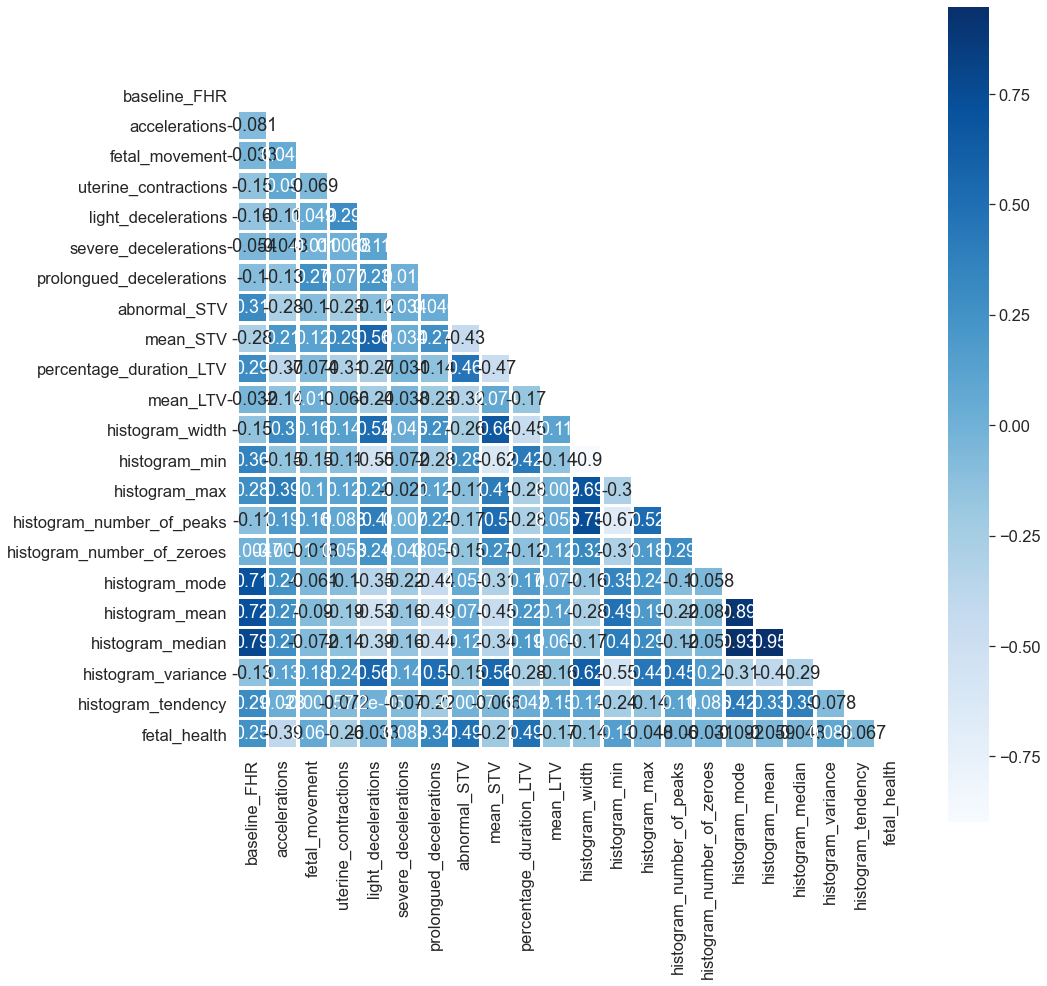

In [20]:
#visualize the correlation
target = df["fetal_health"]
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 15))
    ax = sns.heatmap(corr,mask=mask,square=True,linewidths=2.5,cmap="Blues",annot=True)

### Distribution

Swarmplot and boxenplot helps us to see the distribution of each feature against the target classes. 
There are several outliers but I have decided to not exclude them they can occur in medical situations and these records have reviewed by eperts

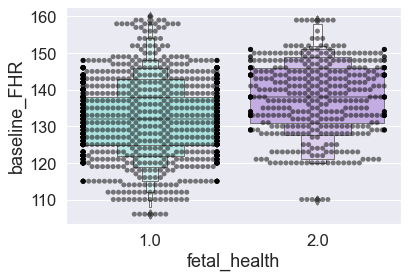

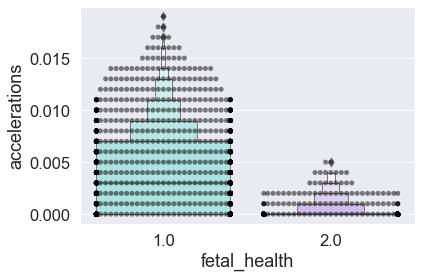

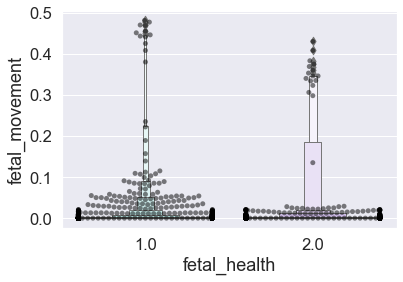

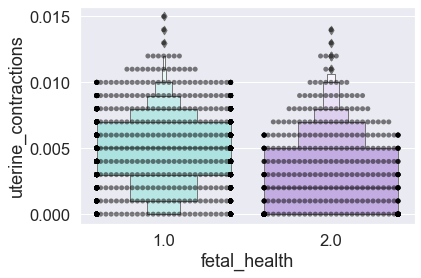

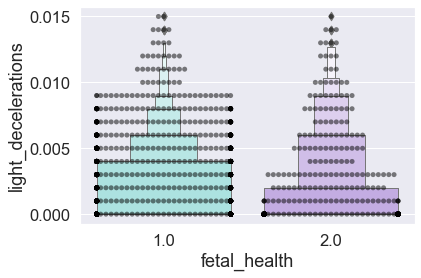

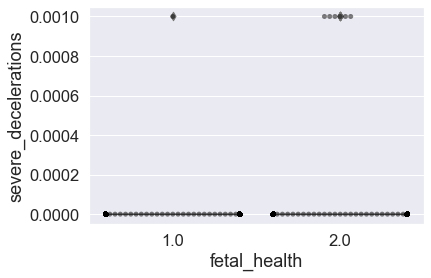

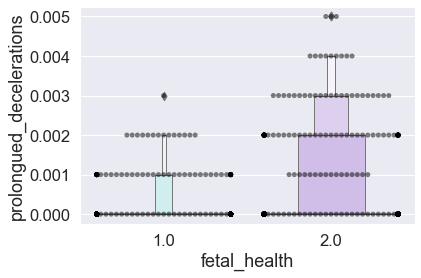

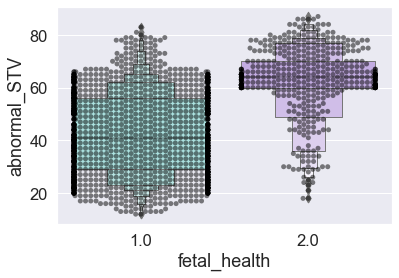

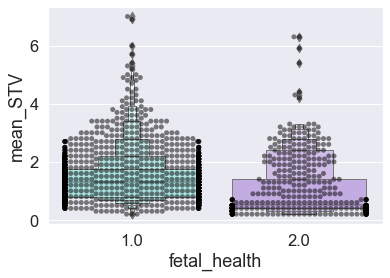

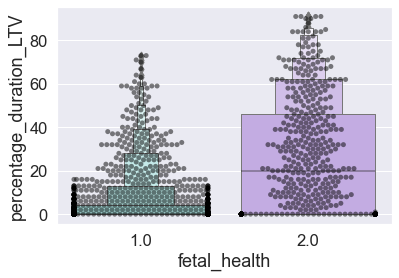

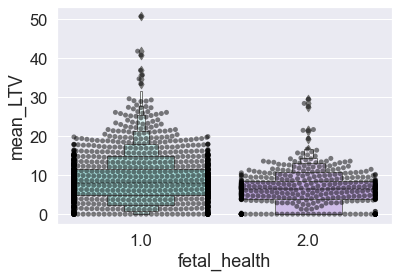

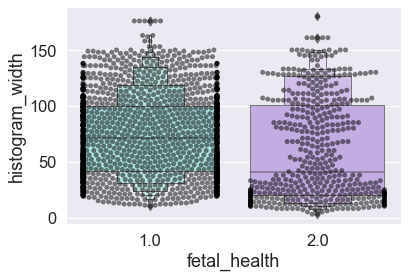

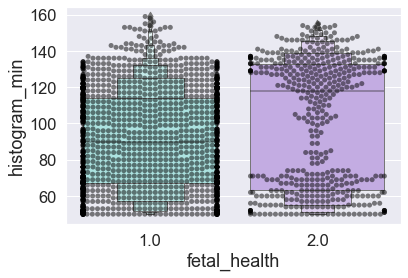

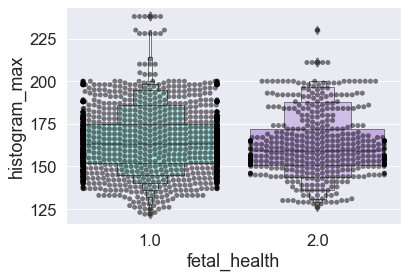

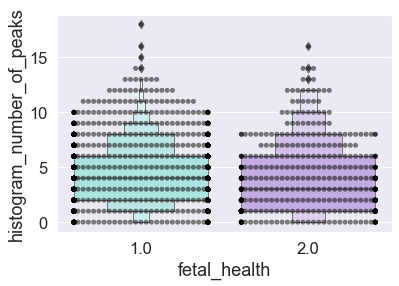

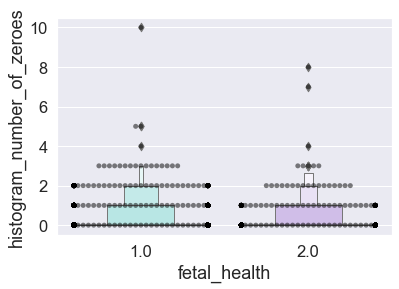

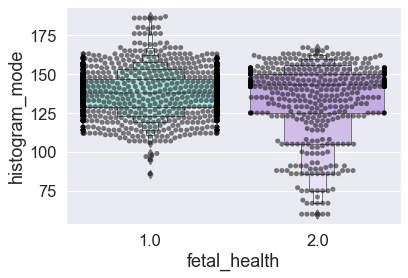

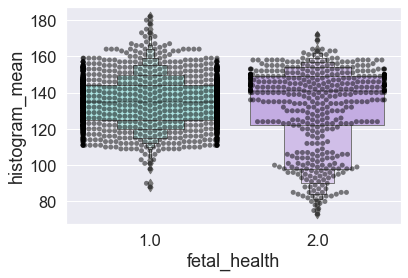

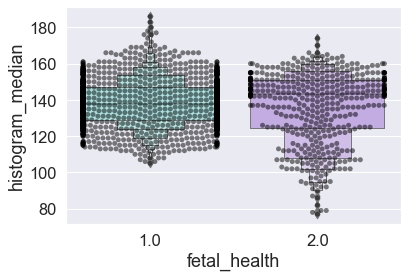

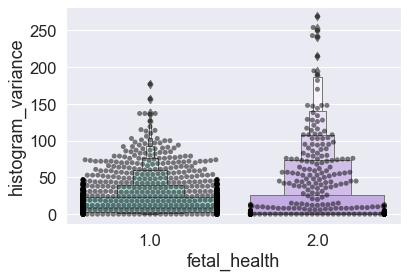

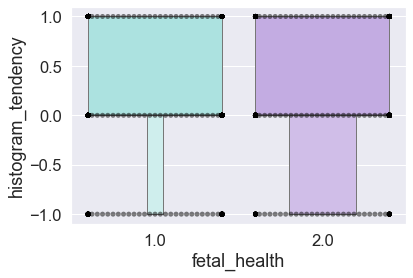

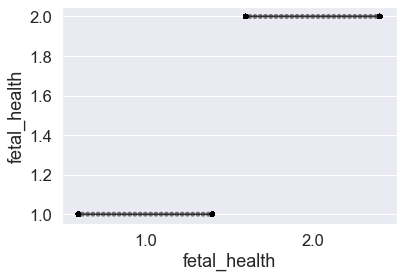

In [21]:
for i in df.columns:
    sns.swarmplot(x=df["fetal_health"], y=df[i], color="black", alpha=0.5 )
    sns.boxenplot(x=df["fetal_health"], y=df[i], palette=colors)
    plt.show()

All the features are numeric and have their own respective unit and scale. We need to scale them before modeling.

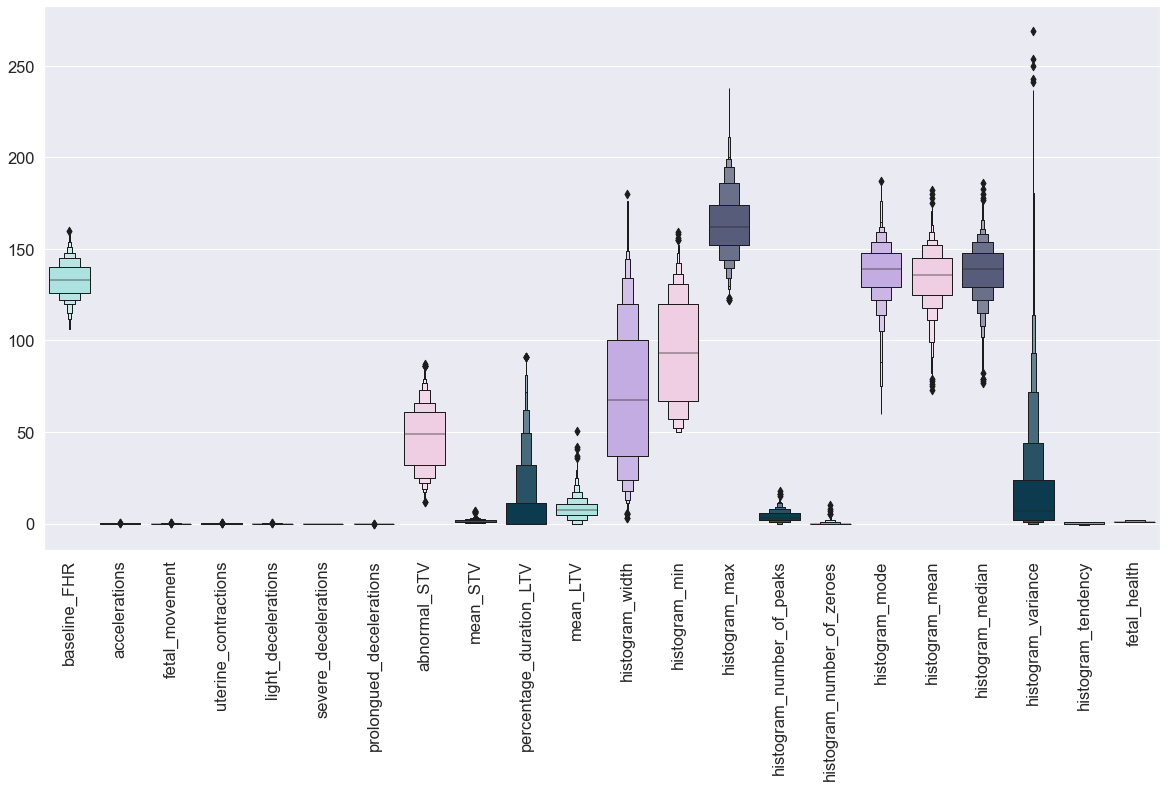

In [22]:
shades =["#A3EBE8","#C2A3EB", "#F5C7E5","#50587f", "#003f5c"]
plt.figure(figsize=(20,10))
sns.boxenplot(data = df,palette = shades)
plt.xticks(rotation=90)
plt.show()

Another way to look at the distribution

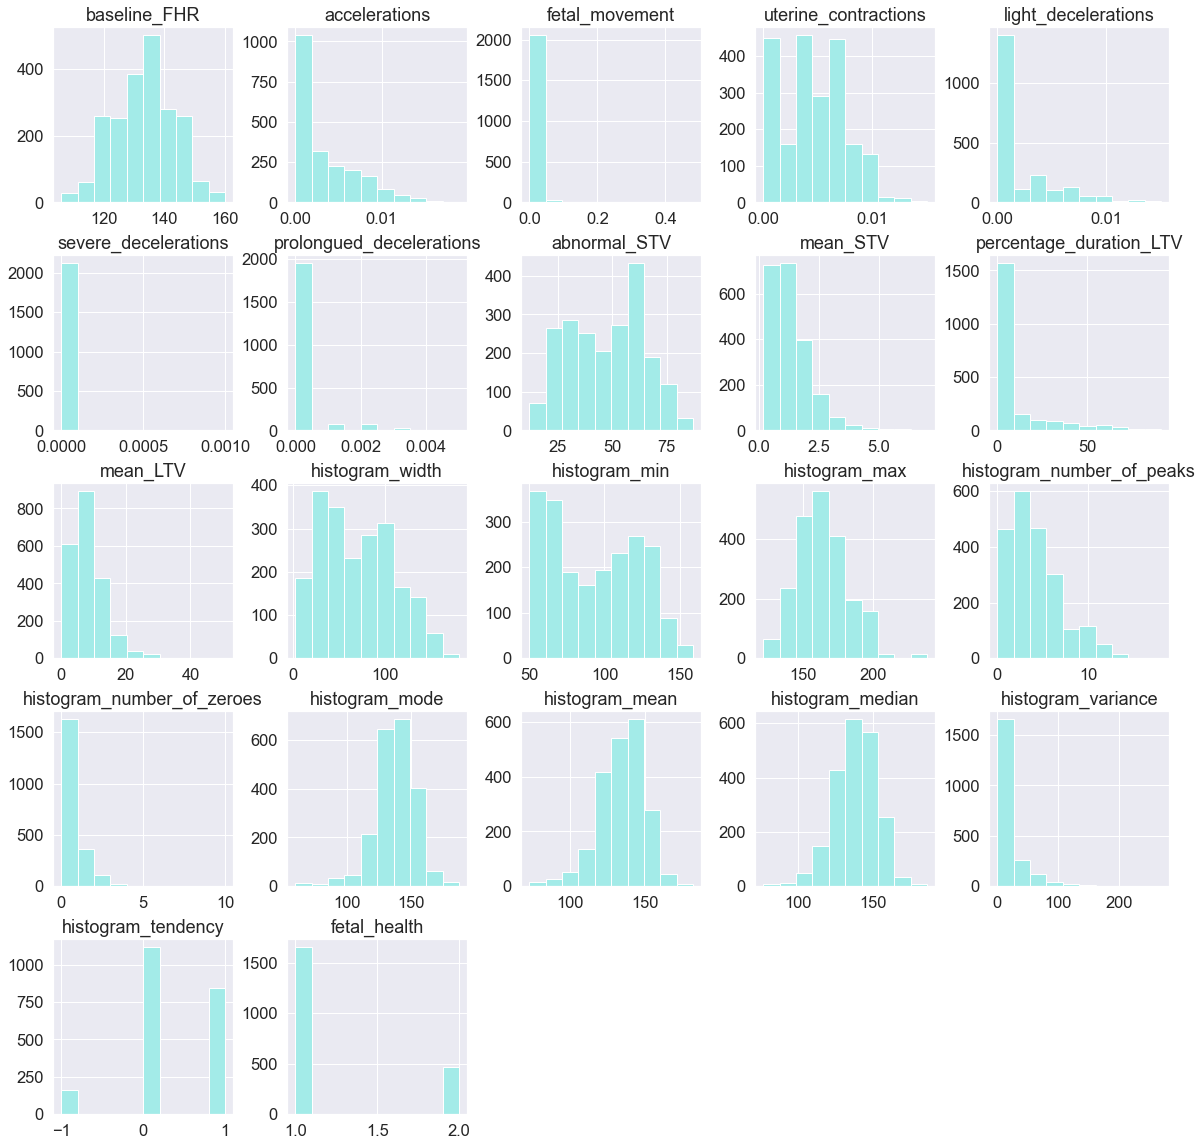

In [23]:
data_hist_plot = df.hist(figsize = (20,20), color = "#A3EBE8")